## EDA PROJECT.

## Topic: Prediction of Melbourne house prices

## Problématique de l'étude

Predicting Melbourne house prices based on house characteristics.

## Necessary  libraries.

In [243]:
## Importing the necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from scipy import stats 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler



# 1- Importation de la base d'étude

In [216]:
!pip install kagglehub

import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("anthonypino/melbourne-housing-market")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\anthonypino\melbourne-housing-market\versions\27


In [244]:
# Load the dataset into pandas
file_path = os.path.join(path, 'Melbourne_housing_FULL.csv')  
df = pd.read_csv(file_path)


In [245]:
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [246]:
## Number of columns and lines
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 34857
Number of Columns : 21


The result shows that we **21** variables which are described on **34857** dwellings in Melbourn.

Here is a brief description of each of these variables.

 **Suburb**: Name of the suburb in Melbourne where the property is located.
 
**Address**: Complete street address of the property.

**Rooms**: Number of rooms in the property, including bedrooms, living areas, etc.

**Type**: Property type: h (house), u (unit), t (townhouse).

**Price**: Final sale price of the property in Australian dollars.

**Method**: Sales method used for the property transaction (e.g., S - property sold, SP - sold prior, PI - passed in).  See data documentation for full list of abbreviations.

**SellerG**: Real estate agent who handled the sale.

**Date**: Date of the property sale.

**Distance**: Distance from the Central Business District (CBD) of Melbourne, in kilometers.

**Postcode**: Postal code of the property\'s location.

**Bedroom2**: Number of bedrooms (an alternative or secondary source for bedroom count).

**Bathroom**: Number of bathrooms in the property.

**Car**: Number of car parking spaces available with the property.

**Landsize**: Area of the land in square meters.

**BuildingArea**: Size of the building in square meters.

**YearBuilt**: Year the property was constructed.

**CouncilArea**: Local government council area where the property is situated.

**Lattitude**: Latitude coordinate of the property\'s location.

**Longtitude**: Longitude coordinate of the property\'s location.

**Regionname**: Broader geographical region of Melbourne (e.g., Northern Metropolitan, Western Victoria).

**Propertycount**: Number of properties in the same suburb.

## Delete the uncessary variables

Before moving on to the analysis of our data, we're going to remove a few variables that aren't necessary.

**Address**: While location is crucial, the full address itself is likely less important than suburb, postcode, or coordinates.  The address is redundant information if other locational data is available.

**SellerG**: The real estate agent is unlikely to be a significant factor in determining the property's price.

**CouncilArea**: This information is highly correlated with Regionname and might be redundant.

**Postcode**: Highly correlated with suburb and coordinates.
In the same way, we'll delete the **Latitude** and **Longitude** variables for dwellings, since they are geographic coordinates of the dwellings and are therefore less necessary in predicting dwelling prices.

Here's the code for deleting these columns.

In [247]:
# Code to remove the columns (uncomment to execute)
columns_to_drop = ['Address', 'SellerG', 'CouncilArea', 'Postcode','Lattitude','Longtitude']
df = df.drop(columns=columns_to_drop, errors='ignore') # errors='ignore' handles cases where a column might not exist


Here's some information on the different variables.

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Rooms          34857 non-null  int64  
 2   Type           34857 non-null  object 
 3   Price          27247 non-null  float64
 4   Method         34857 non-null  object 
 5   Date           34857 non-null  object 
 6   Distance       34856 non-null  float64
 7   Bedroom2       26640 non-null  float64
 8   Bathroom       26631 non-null  float64
 9   Car            26129 non-null  float64
 10  Landsize       23047 non-null  float64
 11  BuildingArea   13742 non-null  float64
 12  YearBuilt      15551 non-null  float64
 13  Regionname     34854 non-null  object 
 14  Propertycount  34854 non-null  float64
dtypes: float64(9), int64(1), object(5)
memory usage: 4.0+ MB


The above results show that there is a variety of data in the study database. These include numeric variables and character strings.

## Numerical variables description.

In [249]:
# Descrition of the numeric data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.0,2.0,3.0,4.0,16.0
Price,27247.0,1.050173e+06,641467.130105,85000.0,635000.0,870000.0,1295000.0,11200000.0
Distance,34856.0,1.118493e+01,6.788892,0.0,6.4,10.3,14.0,48.1
Bedroom2,26640.0,3.084647e+00,0.980690,0.0,2.0,3.0,4.0,30.0
Bathroom,26631.0,1.624798e+00,0.724212,0.0,1.0,2.0,2.0,12.0
Car,26129.0,1.728845e+00,1.010771,0.0,1.0,2.0,2.0,26.0
Landsize,23047.0,5.935990e+02,3398.841946,0.0,224.0,521.0,670.0,433014.0
BuildingArea,13742.0,1.602564e+02,401.267060,0.0,102.0,136.0,188.0,44515.0
YearBuilt,15551.0,1.965290e+03,37.328178,1196.0,1940.0,1970.0,2000.0,2106.0
Propertycount,34854.0,7.572888e+03,4428.090313,83.0,4385.0,6763.0,10412.0,21650.0


## Categoricals variables description

In [250]:
# Description of non numerical variable
df.describe(exclude=np.number)

,Suburb,Type,Method,Date,Regionname
count,34857,34857,34857,34857,34854
unique,351,3,9,78,8
top,Reservoir,h,S,28/10/2017,Southern Metropolitan
freq,844,23980,19744,1119,11836


## Graphical representation of categorial variables.

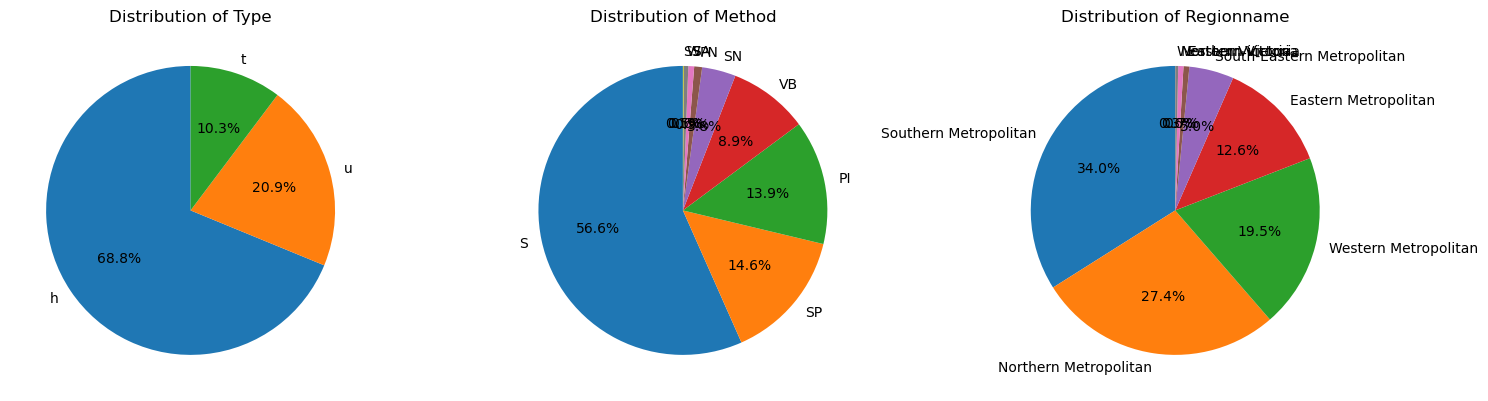

In [224]:
# Assuming df is your DataFrame
categorielle = ['Type', 'Method', 'Regionname']

# Create pie charts for each categorical variable
plt.figure(figsize=(15, 5))  # Adjust figure size as needed

for i, col in enumerate(categorielle):
    if col in df.columns:  # Ensure the column exists
        plt.subplot(1, 3, i + 1)  # Create subplots for each variable
        
        # Calculate value counts and percentages
        counts = df[col].value_counts()
        percentages = counts / counts.sum() * 100
        
        # Create the pie chart
        plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90)
        plt.title(f'Distribution of {col}')
        
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame. Skipping plot.")

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

The results of the above graphs show that **southem Metropolitan (34%)** homes are the best-selling and are paid for more by the **S (56%)** method. These homes are generally **h (68.8%)**.

 ## Processing and identification of missing values

In this section, we'll calculate the proportion of missing values per variable and then decide how best to handle them.

Here's the code for determining the proportion of missing values per variable:

In [251]:
##calculate the percentage of missing values for each column

missing_values_percentage = df.isnull().sum() * 100 / len(df)

# Filter for columns with at least one missing value
missing_values_percentage = missing_values_percentage[missing_values_percentage > 0]

# Create a DataFrame from the results
missing_values_table = pd.DataFrame({
    'Column': missing_values_percentage.index,
    'Missing Percentage': missing_values_percentage.values
})


In [252]:
# Display the table
missing_values_table

,Column,Missing Percentage
0,Price,21.832057
1,Distance,0.002869
2,Bedroom2,23.573457
3,Bathroom,23.599277
4,Car,25.039447
5,Landsize,33.881286
6,BuildingArea,60.576068
7,YearBuilt,55.386293
8,Regionname,0.008607
9,Propertycount,0.008607


### Handling missing values

According to the results above, the variables **Propertycount, Regionname, Distance** contain a low number of missing values. We therefore decide to remove the missing values from these variables.

In [253]:
# Drop rows with missing values in 'Propertycount' and 'Regionname'
df.dropna(subset=['Propertycount', 'Regionname','Distance'], inplace=True)

Since the median is robust with respect to the mean, we have decided to impute all missing values by the median of their variables.

In [254]:
# Impute missing values with the median for specified numerical columns
for col in ['Price', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea','YearBuilt','Rooms']:
    df[col].fillna(df[col].median(), inplace=True)

##calculate the percentage of missing values for each column

missing_values_percentage = df.isnull().sum() * 100 / len(df)

# Filter for columns with at least one missing value
missing_values_percentage = missing_values_percentage[missing_values_percentage > 0]

# Create a DataFrame from the results
missing_values_table = pd.DataFrame({
    'Column': missing_values_percentage.index,
    'Missing Percentage': missing_values_percentage.values
})


In [255]:
# Display the table
missing_values_table

,Column,Missing Percentage


Avant de passer à l'identification des valeurs extrêmes nous allons créer à partir des variables **Date** et **YearBuilt** l'ancienneté des logements.

In [256]:
df['YearBuilt'].fillna(df['YearBuilt'].median(), inplace=True)

# Convert 'Date' to datetime objects, handling errors
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') 

# Extract the year from the 'Date' column
df['SaleYear'] = df['Date'].dt.year

# Calculate the age of the property
df['Anciennete'] = df['SaleYear'] - df['YearBuilt']

# Drop the original 'Date' and 'YearBuilt' columns
df = df.drop(['Date', 'YearBuilt','SaleYear'], axis=1)

## Identifying outliers

In this section we'll plot the boxplot of quantitative variables to identify those with extreme values. 

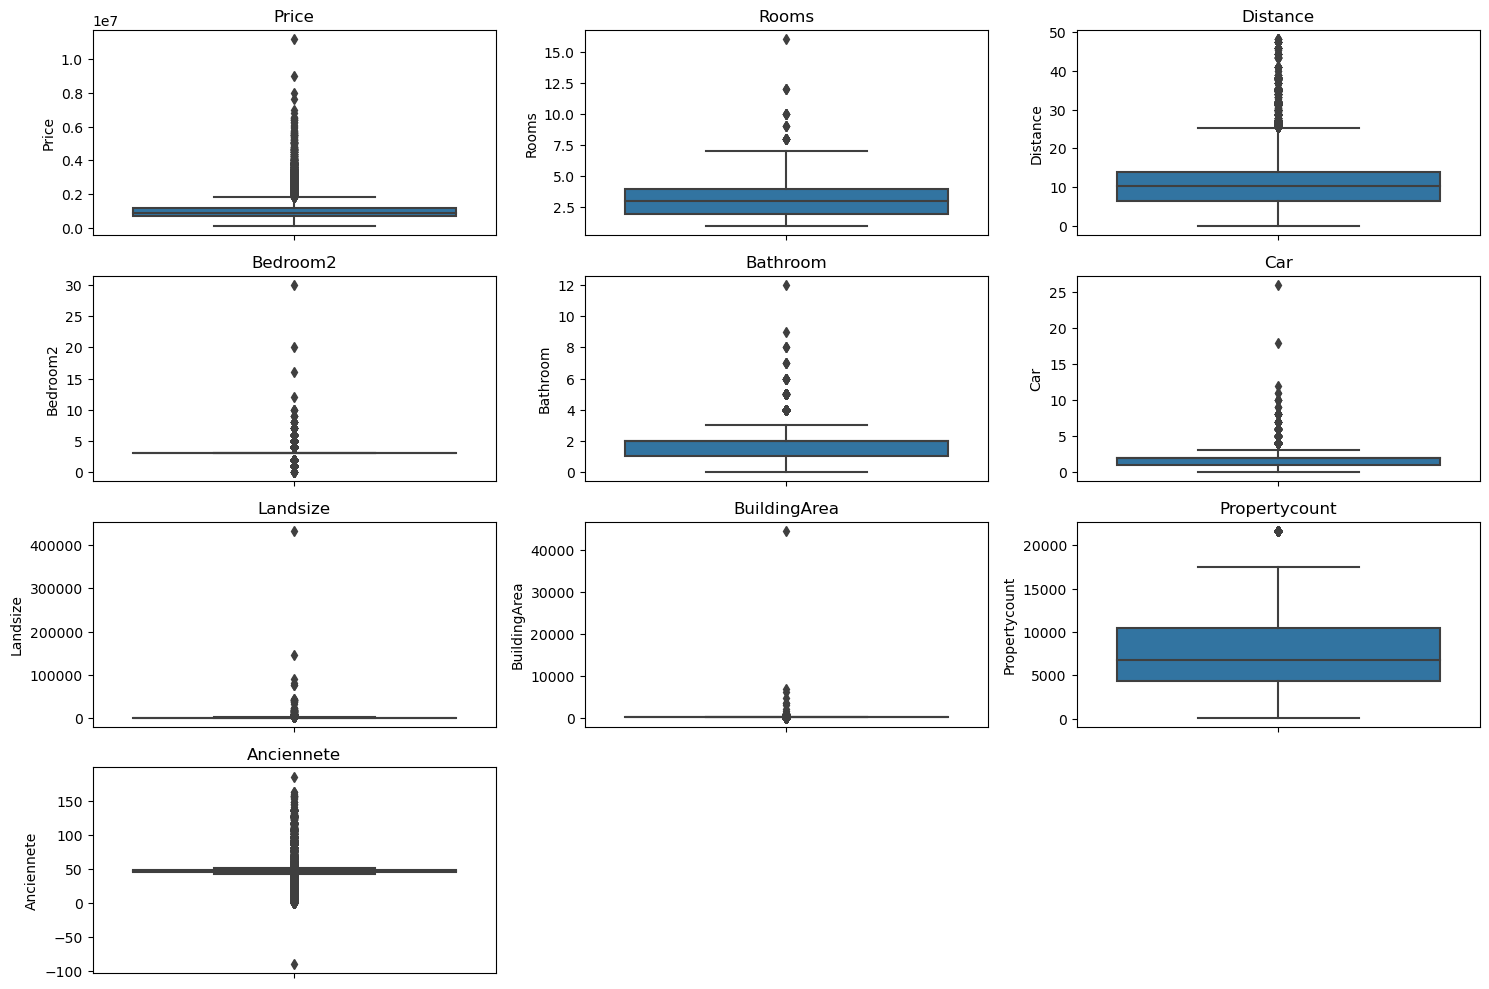

In [258]:
# List of columns for box plots
columns_for_boxplots = ['Price', 'Rooms','Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Propertycount', 'Anciennete']

# Create the box plots
plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, col in enumerate(columns_for_boxplots):
    plt.subplot(4, 3, i + 1)  # Create subplots for better visualization
    sns.boxplot(y=df[col])  # Use Seaborn's boxplot function
    plt.title(col)

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

## Handling extreme values.


The above result shows that almost all variables have large values. Using the interquartile range criterion, let's display the proportion of missing values for each of the variables concerned. Using the interquartile range criterion, the data for a variable is considered extreme when it does not lie between **Q1 - 1.5 * IQR and Q3 +1.5 * IQR**, where **Q1, Q3** and IQR are the first quartile, third quartile and interquartile range respectively.

Displays by variables the number of large values.


In [259]:
def count_outliers(data, column_name):
    """Counts outliers in a given column using the IQR method."""
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return len(outliers)

# Count and print outliers for each column
for column in columns_for_boxplots:
    num_outliers = count_outliers(df, column)
    print(f"Number of outliers in '{column}': {num_outliers}")

Number of outliers in 'Price': 2556
Number of outliers in 'Rooms': 33
Number of outliers in 'Distance': 1467
Number of outliers in 'Bedroom2': 14759
Number of outliers in 'Bathroom': 371
Number of outliers in 'Car': 1514
Number of outliers in 'Landsize': 1323
Number of outliers in 'BuildingArea': 13661
Number of outliers in 'Propertycount': 844
Number of outliers in 'Anciennete': 5362


To handle extreme values, we'll use the **Capping** method. This method consists of imputing for each variable data below Q1 - 1.5 * IQR by Q1 - 1.5 * IQR and by Q3 +1.5 * IQR those above Q3 +1.5 * IQR .

The above code allows us to use Cesure's method to process extreme values.

In [260]:
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data

# Apply capping to the identified columns with outliers
columns_to_check = ['Price', 'Rooms','Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Propertycount', 'Anciennete']

# Count and pr
for col in columns_to_check :
    df = cap_outliers(df, col)

# Count and print outliers for each column
for column in columns_to_check :
    num_outliers = count_outliers(df, column)
    print(f"Number of outliers in '{column}': {num_outliers}")


Number of outliers in 'Price': 0
Number of outliers in 'Rooms': 0
Number of outliers in 'Distance': 0
Number of outliers in 'Bedroom2': 0
Number of outliers in 'Bathroom': 0
Number of outliers in 'Car': 0
Number of outliers in 'Landsize': 0
Number of outliers in 'BuildingArea': 0
Number of outliers in 'Propertycount': 0
Number of outliers in 'Anciennete': 0


## Histogram of quantitative variables.

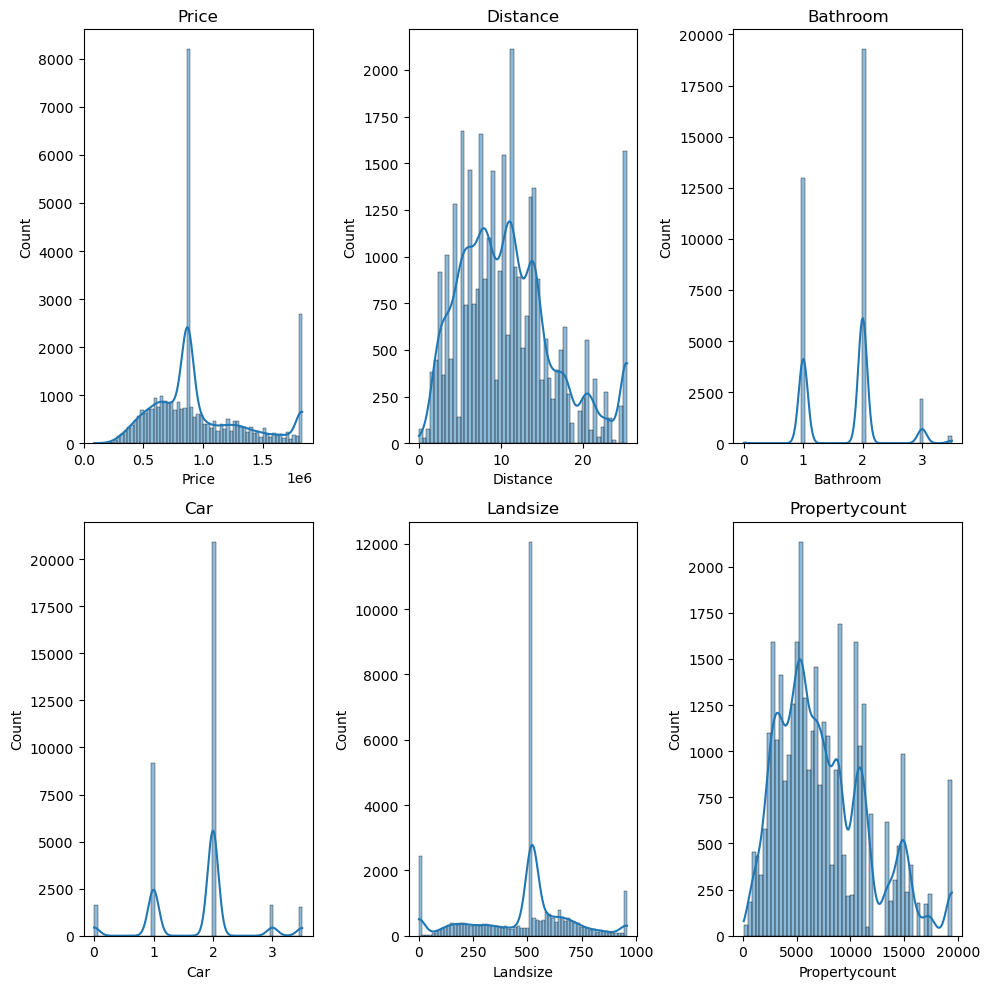

In [261]:
import matplotlib.pyplot as plt

# Apply capping to the identified columns with outliers
columns_to_check = ['Price','Distance', 'Bathroom','Car', 'Landsize', 'Propertycount']

plt.figure(figsize=(10, 10))  # Set the figure size

for i, col in enumerate(columns_to_check):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)  # Plot histogram with density curve
    plt.title(col)

plt.tight_layout()
plt.show()

## Correlation matrix for quantitative variables

To better identify the variables that can explain house prices, we'll calculate the correlation matrix of quantitative variables and the scatterplot.

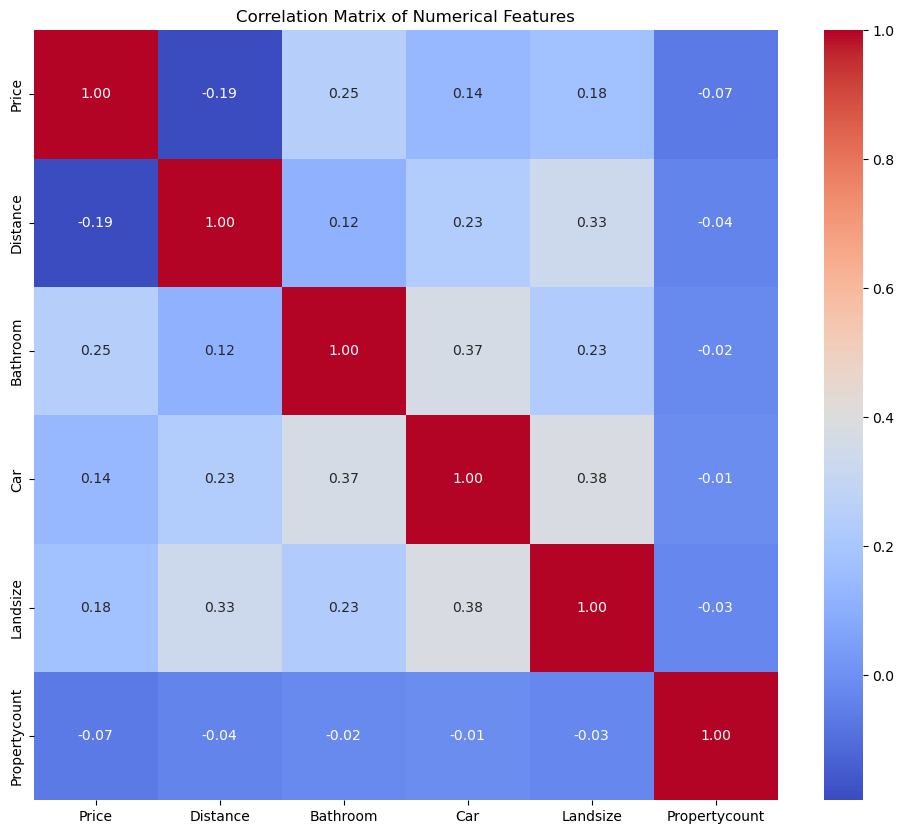

In [262]:
# Calculate the correlation matrix
correlation_matrix = df[columns_to_check].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


The correlation matrix shows that there is a weak correlation between price and the various quantitative variables considered. 

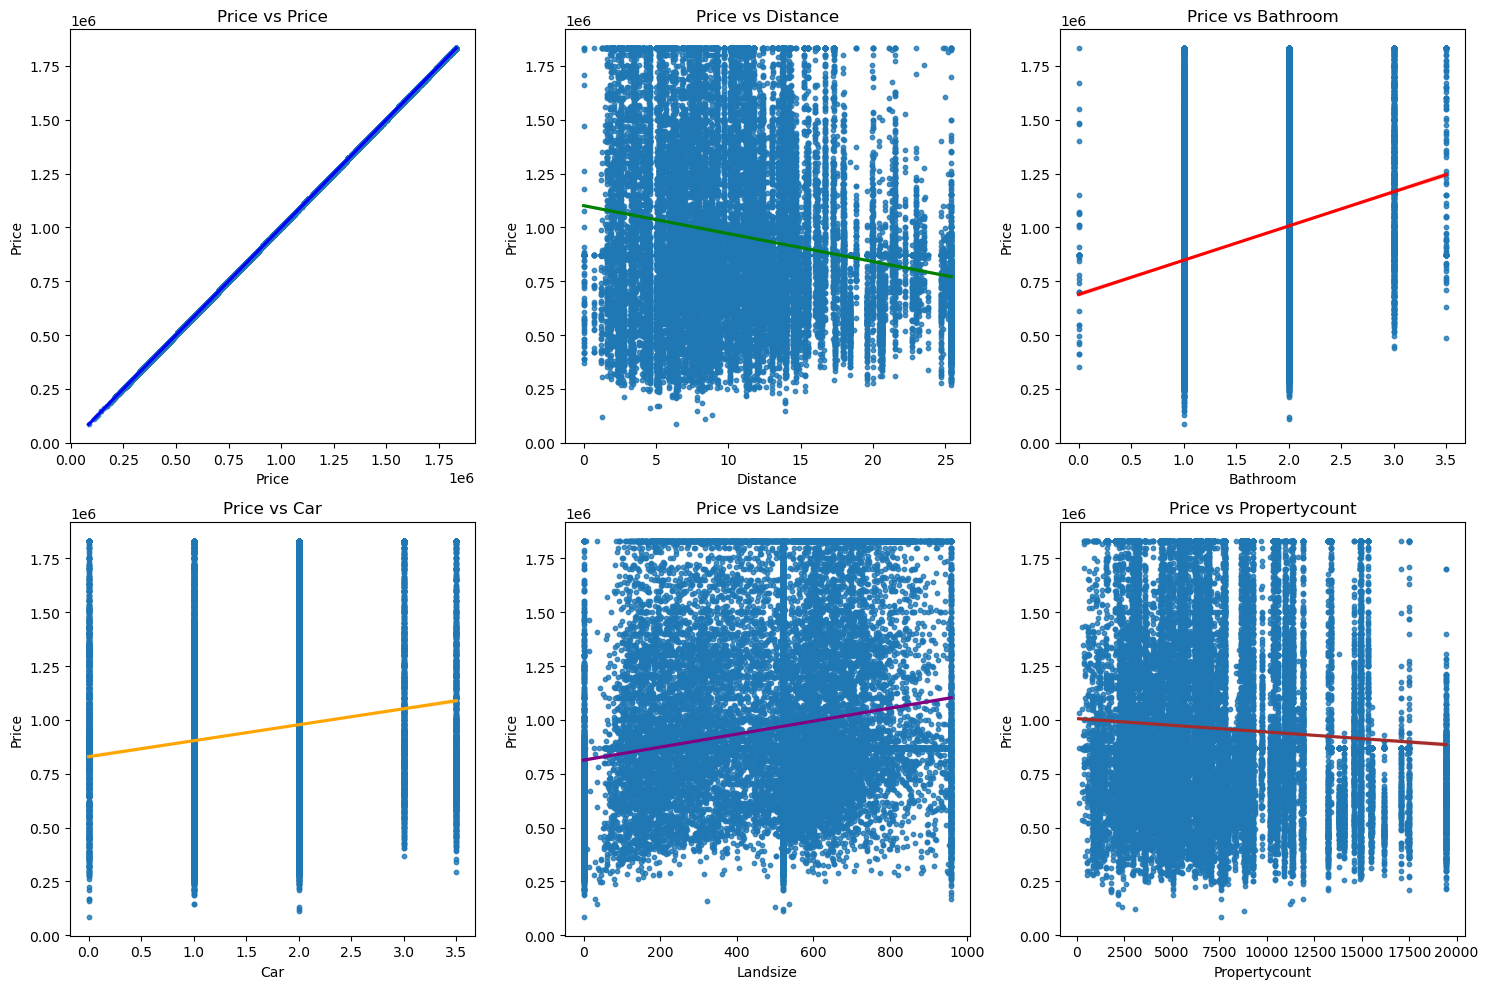

In [263]:
# Define colors for the regression lines
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']

# Create the scatter plot with regression lines
plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, col in enumerate(columns_to_check):
    plt.subplot(2, 3, i + 1)  # Create subplots for each variable
    sns.regplot(x=df[col], y=df['Price'], scatter_kws={'s': 10}, line_kws={'color': colors[i]})  # Scatter plot with regression line
    plt.title(f'Price vs {col}')
plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

The above results once again confirm the results of the correlation matices between the various quantitative variables.

## Moustache box of categorical variables with housing prices.

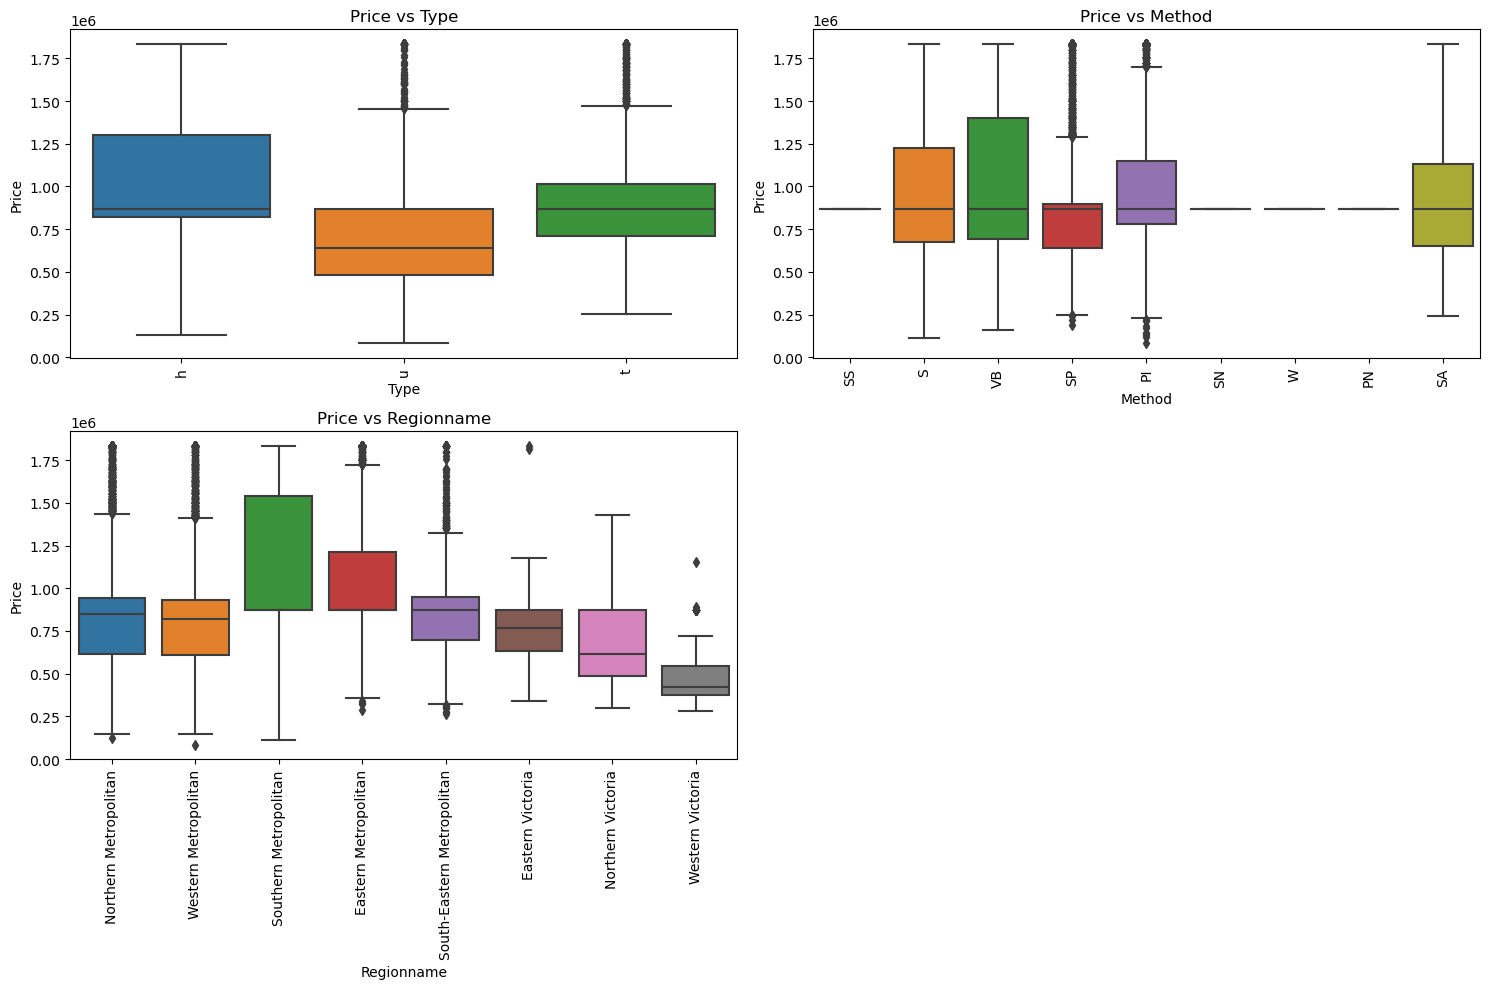

In [239]:

categorielle = ['Type', 'Method', 'Regionname']

# Create box plots for each categorical variable against 'Price'
plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, col in enumerate(categorielle):
    plt.subplot(2, 2, i + 1)  # Create subplots for each variable
    sns.boxplot(x=df[col], y=df['Price'])  # Box plot
    plt.title(f'Price vs {col}')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()


The above results show that there is not enough difference between house prices and payment transaction methods, but regions of house location and house types could explain house prices.

In the section above, we will essentially transform our data to build our different house price prediction models. The main task will be to encode the categorical variables and to put all the quantitative variables on the same scales in order to guarantee the interpretability of the models.

## Encoding categorial variables

In [240]:
# Sélection des colonnes catégorielles (à adapter selon vos données)
categorical_cols = ['Suburb', 'Type', 'Method', 'Regionname']

# Instanciation de l'encodeur
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) 

# Encodage des colonnes catégorielles
encoded_data = encoder.fit_transform(df[categorical_cols])

# Création d'un nouveau DataFrame avec les colonnes encodées
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concaténation du DataFrame encodé avec le DataFrame original (sans les colonnes catégorielles originales)
df = pd.concat([df.drop(columns=categorical_cols, errors='ignore'), encoded_df], axis=1)


In [241]:
# Affichage des premières lignes du DataFrame encodé
df.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Anciennete,...,Method_VB,Method_W,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2.0,870000.0,2.5,3.0,1.0,1.0,126.0,136.0,4019.0,46.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1480000.0,2.5,3.0,1.0,1.0,202.0,136.0,4019.0,46.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2.0,1035000.0,2.5,3.0,1.0,0.0,156.0,136.0,4019.0,51.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3.0,870000.0,2.5,3.0,2.0,1.0,0.0,136.0,4019.0,46.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3.0,1465000.0,2.5,3.0,2.0,0.0,134.0,136.0,4019.0,51.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Scaling quantitative data (Normalization)

In [242]:
from sklearn . preprocessing import MinMaxScaler

numerical_cols = ['Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Propertycount', 'Anciennete']
scaler = MinMaxScaler ()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [185]:
df.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Anciennete,...,Method_VB,Method_W,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2.0,0.449213,0.098425,0.0,0.285714,0.285714,0.131318,0.0,0.203206,0.375,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.798283,0.098425,0.0,0.285714,0.285714,0.210526,0.0,0.203206,0.375,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.543634,0.098425,0.0,0.285714,0.000000,0.162585,0.0,0.203206,1.000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.449213,0.098425,0.0,0.571429,0.285714,0.000000,0.0,0.203206,0.375,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.789700,0.098425,0.0,0.571429,0.000000,0.139656,0.0,0.203206,1.000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
